In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore')
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("/kaggle/input/maternal-health-risk-data/Maternal Health Risk Data Set.csv")
print(df.shape)
df.head()

(1014, 7)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [4]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [5]:
df['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [6]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

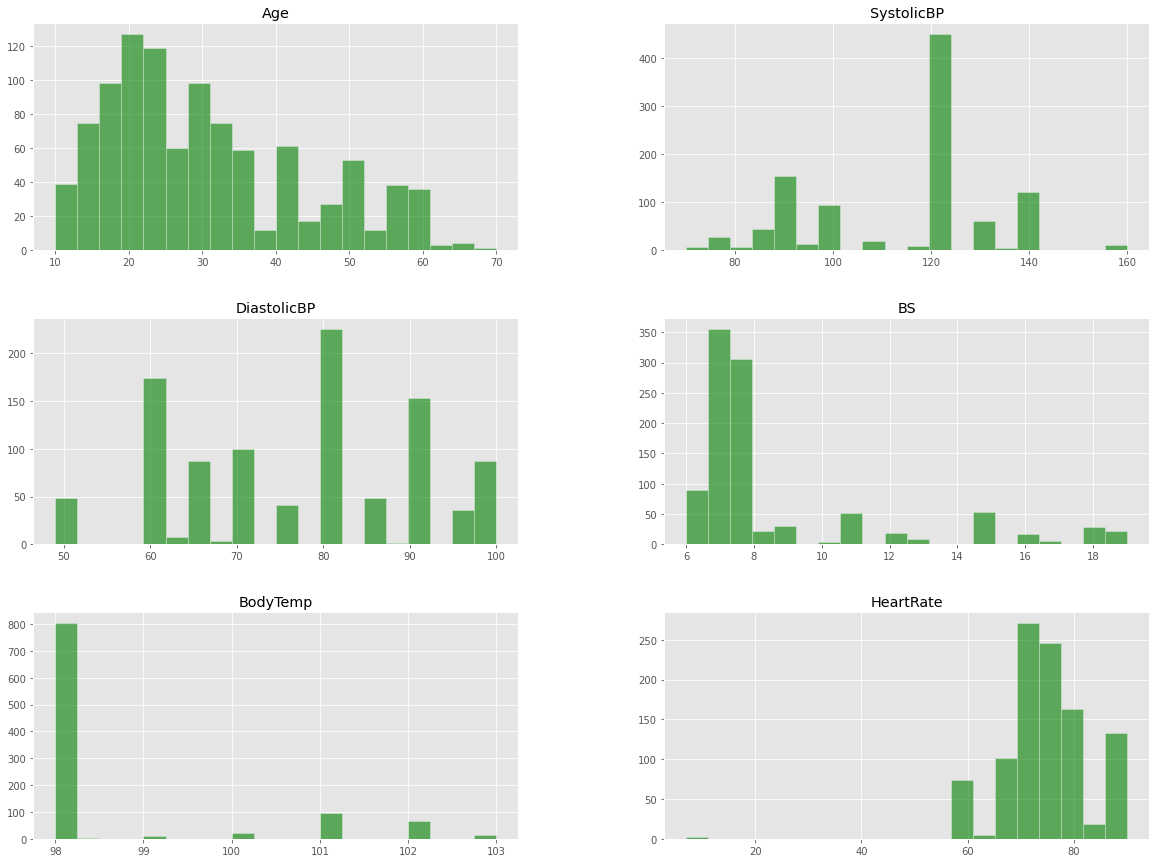

In [7]:
df.hist(figsize=(20,15),ec='white',bins=20,color='green',alpha=0.6)
plt.show()

<Figure size 720x360 with 0 Axes>

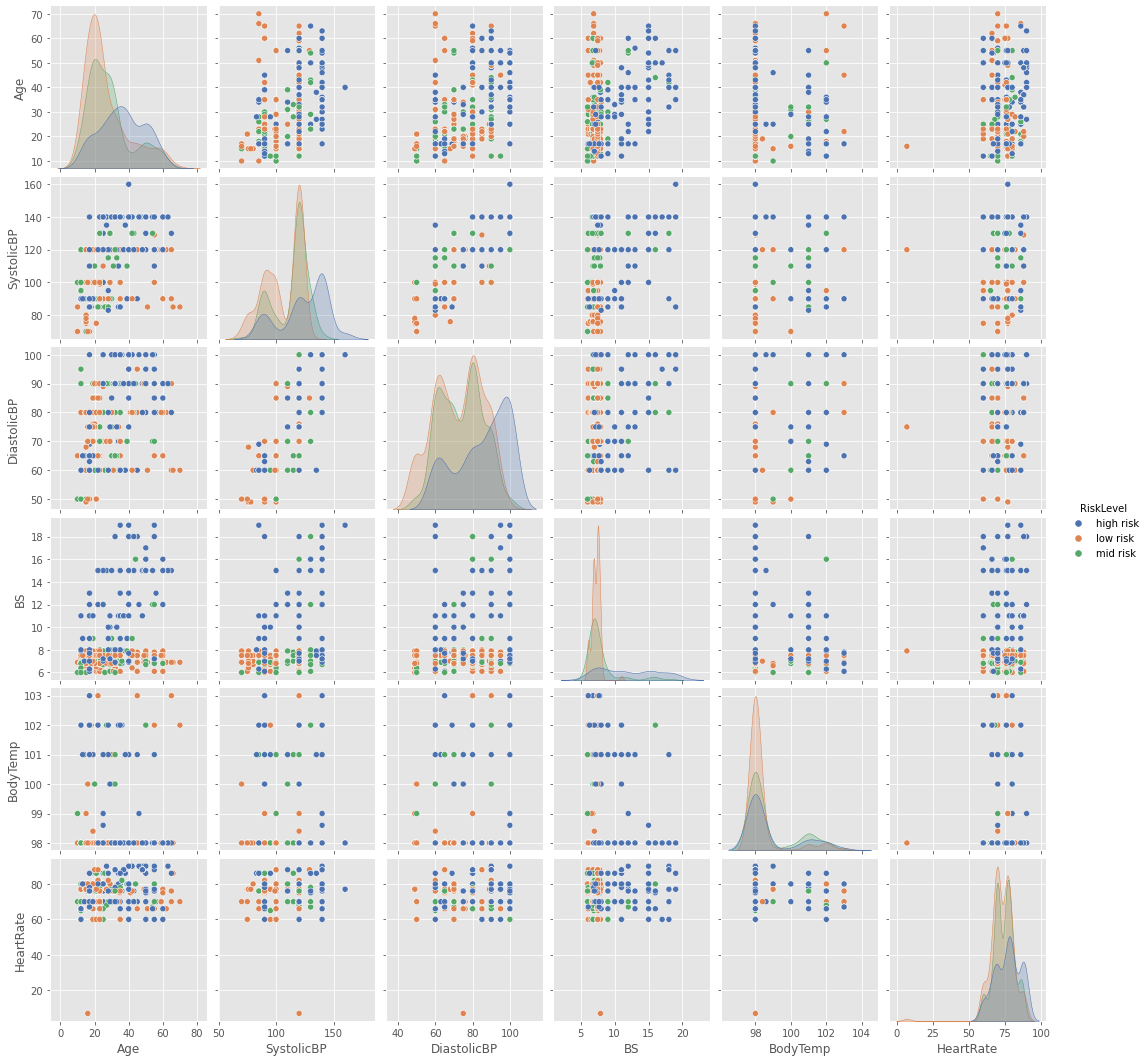

In [8]:
plt.figure(figsize=(10,5))
sns.pairplot(df, hue="RiskLevel", palette="deep",diag_kind="kde")

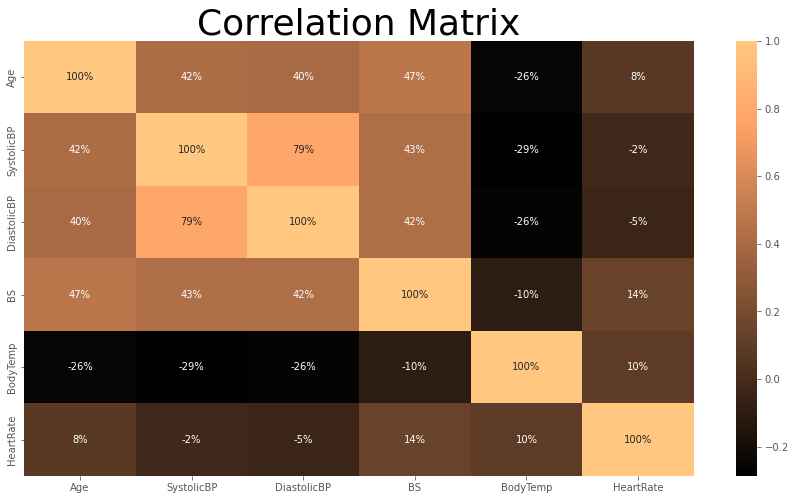

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt=".0%",cmap='copper')
plt.title('Correlation Matrix',size=36)
plt.show()

In [10]:
risk = {"low risk":0,"mid risk":1,"high risk":2}
df['RiskLevel'] = df['RiskLevel'].map(risk)
df['RiskLevel'].value_counts()

0    406
1    336
2    272
Name: RiskLevel, dtype: int64

In [11]:
X = df.drop('RiskLevel',axis=1)
y = df['RiskLevel']

In [12]:
X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70


In [13]:
y

0       2
1       2
2       2
3       2
4       0
       ..
1009    2
1010    2
1011    2
1012    2
1013    1
Name: RiskLevel, Length: 1014, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.215, random_state = 45)
y_test

482    2
562    0
33     0
968    2
99     1
      ..
299    1
962    2
84     1
393    0
446    1
Name: RiskLevel, Length: 219, dtype: int64

In [15]:
print('Training Shape x:',X_train.shape)
print('Testing Shape x:',X_test.shape)
print('Training Shape y:',y_train.shape)
print('Testing Shape y:',y_test.shape)

Training Shape x: (795, 6)
Testing Shape x: (219, 6)
Training Shape y: (795,)
Testing Shape y: (219,)


In [16]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [17]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 63.926940639269404


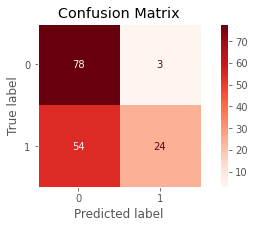

In [18]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model1, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [19]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [20]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 88.12785388127854


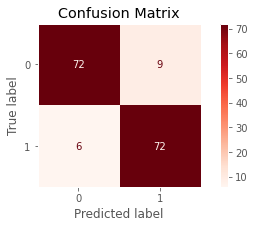

In [21]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model2, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [22]:
model3 = GaussianNB()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

In [23]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 58.9041095890411


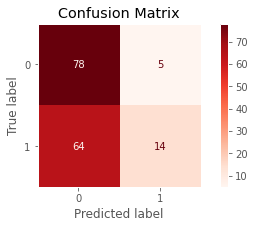

In [24]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model3, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [25]:
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)


In [26]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 85.38812785388129


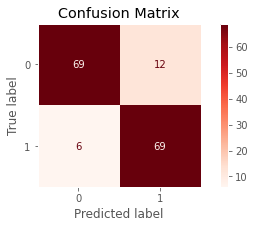

In [27]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model4, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [28]:
model5 = SVC()
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)

In [29]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 61.64383561643836


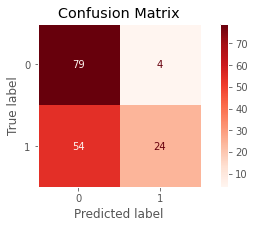

In [30]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model5, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [31]:
model6=AdaBoostClassifier()
model6.fit(X_train, y_train)
y_pred = model6.predict(X_test)

In [32]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 68.4931506849315
